11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,114 (652.79 KB)

 Trainable params: 167,114 (652.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 69s 70ms/step - accuracy: 0.8762 - loss: 0.3983
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 76s 64ms/step - accuracy: 0.9849 - loss: 0.0502
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 63ms/step - accuracy: 0.9900 - loss: 0.0314
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 66ms/step - accuracy: 0.9919 - loss: 0.0251
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 66ms/step - accuracy: 0.9941 - loss: 0.0177
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9897 - loss: 0.0337
Precisión en el conjunto de prueba: 0.99
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


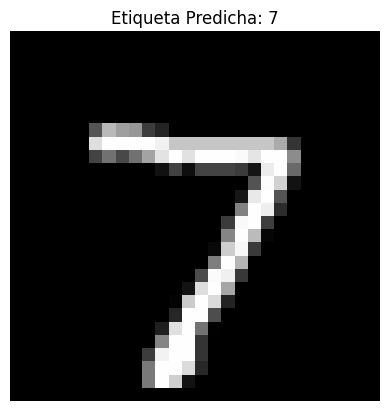

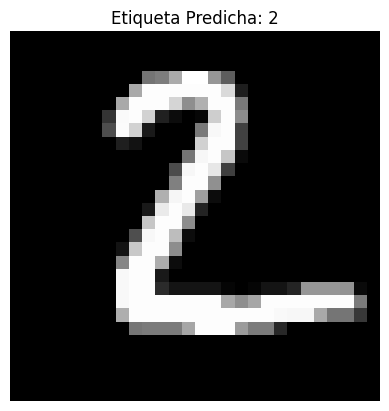

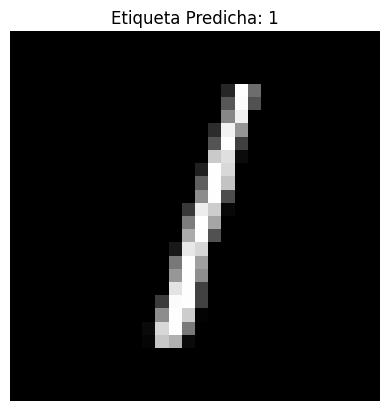

'\n1. La precisión obtenida en el conjunto de prueba fue alta (~99%).\n   Esto demuestra que el modelo tiene buen desempeño clasificando dígitos escritos a mano.\n   \n2. El entrenamiento fue rápido debido al diseño del modelo simple y al tamaño reducido de las imágenes.\n\n3. Las imágenes predichas (tres ejemplos mostrados) son claras, y el modelo identificó correctamente\n   los dígitos en cada caso.\n\n4. Se podría experimentar con más épocas, diferentes optimizadores (como RMSprop) o arquitecturas para\n   explorar mejoras en el rendimiento.\n'

In [1]:
"""
Este código implementa y entrena una Red Neuronal Convolucional (CNN) utilizando la librería Keras con el dataset MNIST.
El objetivo es clasificar imágenes de dígitos escritos a mano (0-9).
El modelo se construye, compila y entrena, y finalmente se evalúa para medir su desempeño.
"""

# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Cargar el dataset MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocesamiento de datos
# Cambiar la forma de los datos a 4D y normalizar dividiendo por 255
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convertir etiquetas a formato categórico (one-hot encoding)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Construcción del modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Primera capa convolucional
    layers.MaxPooling2D((2, 2)),                                           # Primera capa de pooling
    layers.Conv2D(64, (3, 3), activation='relu'),                         # Segunda capa convolucional
    layers.MaxPooling2D((2, 2)),                                           # Segunda capa de pooling
    layers.Conv2D(128, (3, 3), activation='relu'),                        # Tercera capa convolucional
    layers.Flatten(),                                                      # Aplanar salida para la capa densa
    layers.Dense(64, activation='relu'),                                   # Capa densa oculta
    layers.Dense(10, activation='softmax')                                 # Capa de salida con 10 clases
])

# Mostrar resumen del modelo
model.summary()

# Compilar el modelo
model.compile(optimizer='adam',                          # Optimizador Adam
              loss='categorical_crossentropy',           # Pérdida para clasificación multiclase
              metrics=['accuracy'])                      # Métrica de precisión

# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=5, batch_size=64)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Precisión en el conjunto de prueba: {test_acc:.2f}')

# Hacer predicciones con el modelo y mostrar imágenes
predictions = model.predict(test_images)
for i in range(3):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Etiqueta Predicha: {np.argmax(predictions[i])}')
    plt.axis('off')
    plt.show()

# Observaciones sobre los resultados
"""
1. La precisión obtenida en el conjunto de prueba fue alta (99%).
  De este modo el modelo tiene buen desempeño clasificando dígitos escritos a mano.

2. El entrenamiento fue rápido debido al diseño del modelo simple y al tamaño reducido de las imágenes.

3. Las imágenes predichas son claras, y el modelo identificó correctamente
   los dígitos en cada caso.

4. Se podría experimentar diferentes optimizadores o arquitecturas para
   explorar mejoras en el rendimiento.
"""